✅ Signals saved to AAPL_signals.csv


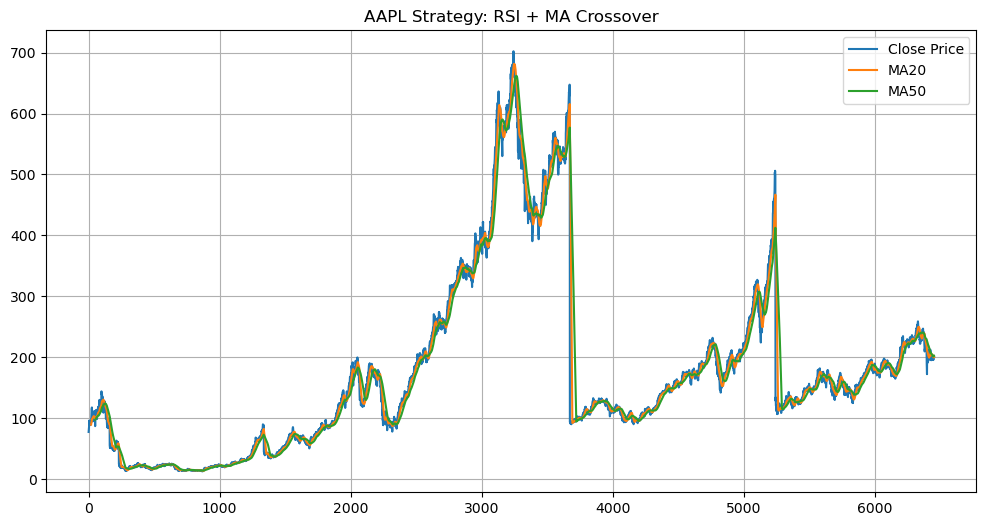

In [1]:
# 📈 RSI + Moving Average Strategy for AAPL (or any ticker CSV)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data (use AAPL, MSFT, GOOGL)
df = pd.read_csv('AAPL_data.csv')
df = df.rename(columns=lambda x: x.strip())  # clean column names

# Calculate RSI
delta = df['4. close'].diff()
gain = delta.where(delta > 0, 0).rolling(14).mean()
loss = -delta.where(delta < 0, 0).rolling(14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Moving averages
df['MA20'] = df['4. close'].rolling(20).mean()
df['MA50'] = df['4. close'].rolling(50).mean()

# Strategy: Buy when RSI < 30 and MA20 > MA50
df['Buy'] = (df['RSI'] < 30) & (df['MA20'] > df['MA50'])
df['Buy Signal'] = df['Buy'].apply(lambda x: 'BUY' if x else '')

# Save signals
df.to_csv('AAPL_signals.csv', index=False)
print("✅ Signals saved to AAPL_signals.csv")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['4. close'], label='Close Price')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.title("AAPL Strategy: RSI + MA Crossover")
plt.legend()
plt.grid(True)
plt.show()
